In [1]:
import albumentations as A
import cv2
import numpy as np
import pandas as pd
import torch
import plotly.express as px

In [2]:
%load_ext autoreload
%autoreload 2
from nncomp_molecule import constants
from nncomp_molecule.preprocessors import Binalize, Denoise, SaltAndPepperNoise

In [3]:
PREPROCESSED_DIR = constants.INPUTDIR / "kfujikawa" / "bms-preprocess-v2"

In [4]:
train_df = pd.read_pickle(PREPROCESSED_DIR / "train.pkl").sort_values("image_id").reset_index(drop=True)
test_df = pd.read_pickle(PREPROCESSED_DIR / "test.pkl").sort_values("image_id").reset_index(drop=True)

## Train set

In [8]:
height, width, _ = image.shape
row_indices, col_indices, _ = list(np.where(image < 255))
min_x, max_x = col_indices.min(), col_indices.max()
min_y, max_y = row_indices.min(), row_indices.max()
margin = min(min_x, min_y, width - max_x, height - max_y)
if min_x > min_y:
    min_x, max_x = min_x - margin, max_x + margin
    min_y, max_y = 0, height
else:
    min_y, max_y = min_y - margin, max_y + margin
    min_x, max_x = 0, width


In [13]:
class ImageInsideCropping(A.ImageOnlyTransform):
    def apply(self, image, **params):
        row_indices, col_indices, _ = list(np.where(image > 0))
        min_x, max_x = col_indices.min(), col_indices.max()
        min_y, max_y = row_indices.min(), row_indices.max()
        cropped_image = image[min_y:max_y, min_x:max_x]
        return cropped_image

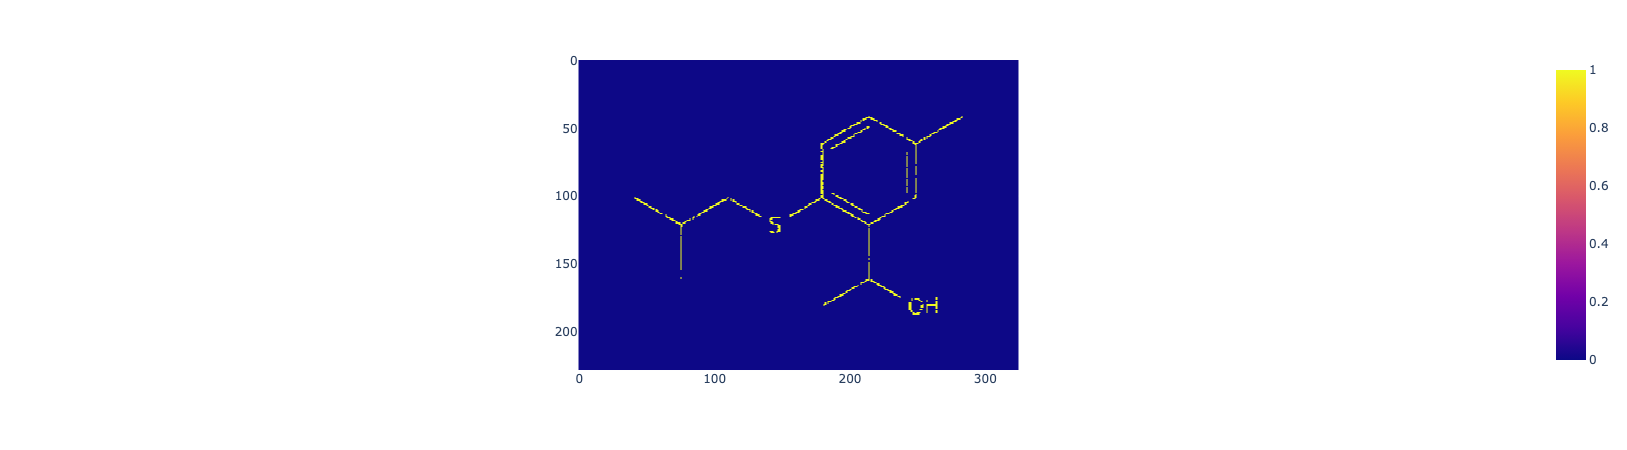

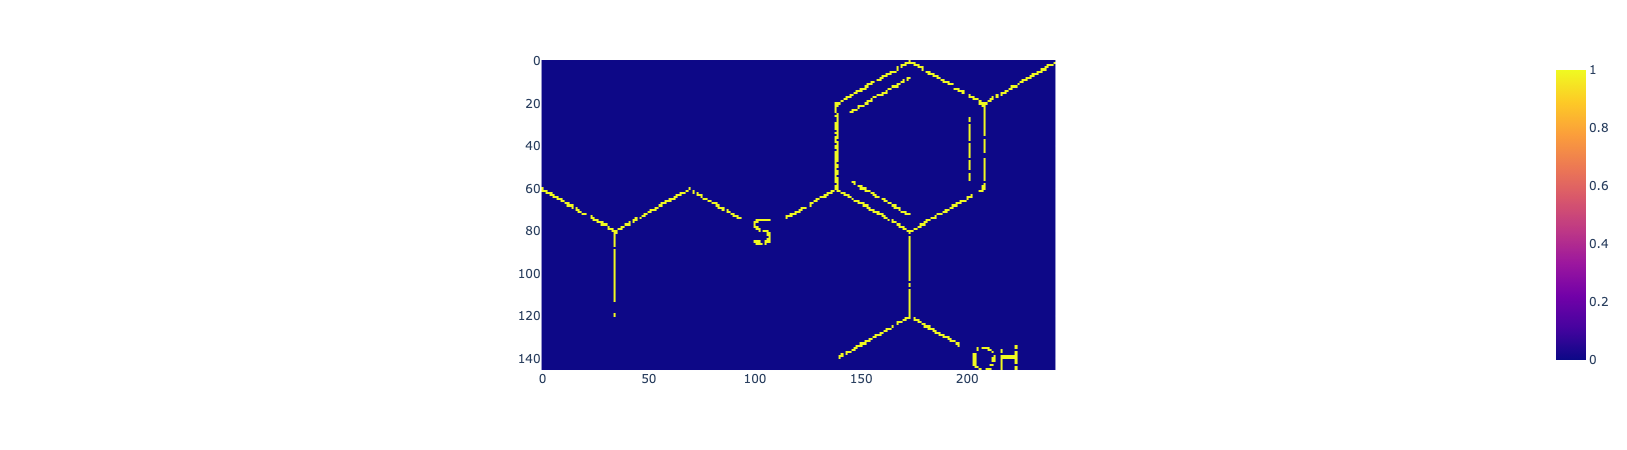

In [20]:
INDEX = 0

binalize = A.Compose([
    Binalize(),
    Denoise(),
])
crop = A.Compose([
    ImageInsideCropping(p=1),
])
sample = train_df.iloc[INDEX]
image = cv2.imread(sample.image_path, cv2.IMREAD_GRAYSCALE)[:, :, None]
image = binalize(image=image)["image"]
display(px.imshow(image[:, :, 0]))
image = crop(image=image)["image"]
display(px.imshow(image[:, :, 0]))